# **Data Exploration**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df1 = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df1.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [2]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [3]:
df1.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


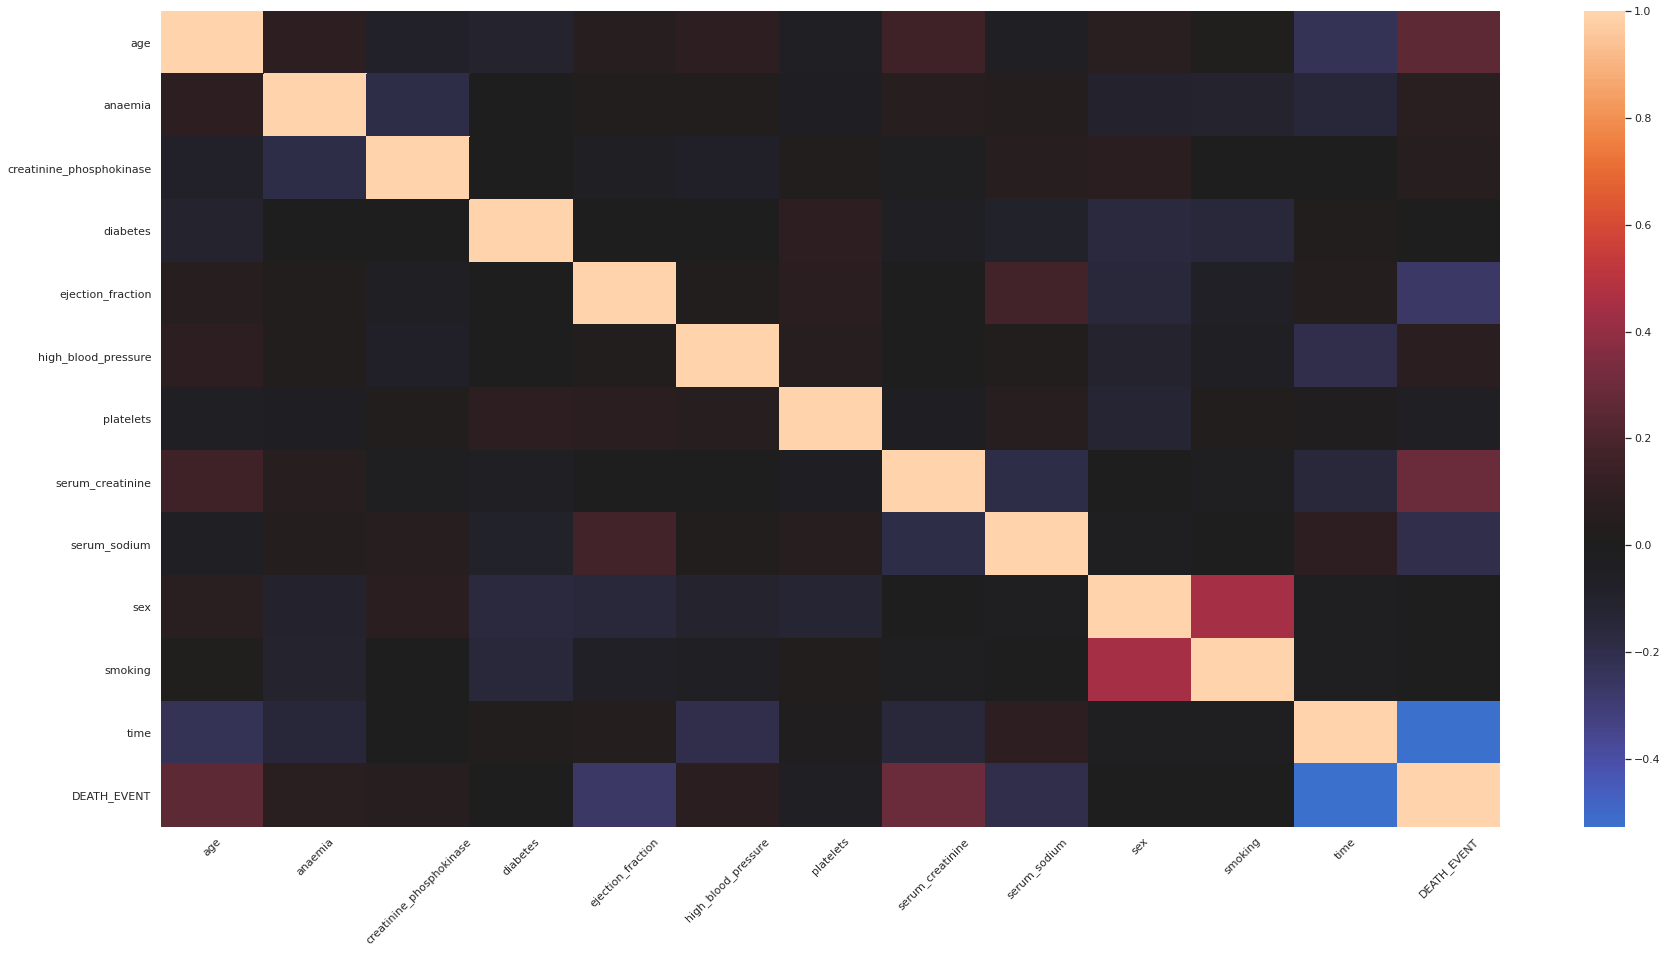

In [4]:
sns.set(rc={'figure.figsize':(30,15)})
plt.yticks(rotation=45)
plt.xticks(rotation=45)
sns.heatmap(df1.corr(), center=0)

# **Data Cleaning**

## Min-Max Normalisation

In [5]:
df = df1[["age", "creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium", "time"]].copy()
df1.drop(["age", "creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium", "time"], axis=1, inplace=True)
min_max_df =(df-df.min())/(df.max()-df.min())
min_max_df = min_max_df.join(df1)
# min_max_df.to_csv("min-max.csv", index=False)

# **Modelling**

## Dropping Time Feature / Train-Test Split

In [6]:
#from keras.models import Sequential
from tensorflow.keras import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import export_text
import sklearn.ensemble
from sklearn.model_selection import GridSearchCV
import os, matplotlib, graphviz
import keras,math,time
import matplotlib.pyplot as plt
import numpy


Y_position = 12

# fix random seed for reproducibility
numpy.random.seed(7)
# load min-max normailised dataset
df = pd.read_csv("min-max.csv")
# split into input (X) and output (Y) variables

display(df.head())

X = df.drop(["DEATH_EVENT", "time"],axis=1)
print(X.shape)
Y = df.iloc[:,Y_position]
print(Y.shape)
# create model
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT
0,0.636364,0.071319,0.090909,0.290823,0.157303,0.485714,0.000000,0,0,1,1,0,1
1,0.272727,1.000000,0.363636,0.288833,0.067416,0.657143,0.007117,0,0,0,1,0,1
2,0.454545,0.015693,0.090909,0.165960,0.089888,0.457143,0.010676,0,0,0,1,1,1
3,0.181818,0.011227,0.090909,0.224148,0.157303,0.685714,0.010676,1,0,0,1,0,1
4,0.454545,0.017479,0.090909,0.365984,0.247191,0.085714,0.014235,1,1,0,0,0,1


(299, 11)
(299,)


## Regression

1.   Normal Regression
2.   Ridge Regression
3.   Lasso Regression

In [7]:
#NORMAL REGRESSION

scaled_X_train = X_train
scaled_X_test = X_test

#Model 1 : linear regression
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
#class sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, 
#intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', 
#verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

linear_classifier = linear_model.LogisticRegression(random_state=123)
linear_classifier.fit(scaled_X_train, y_train)
y_pred_train1 = linear_classifier.predict(scaled_X_train)
cm1_train = confusion_matrix(y_train,y_pred_train1)
print("Regression")
print("================================")
print(cm1_train)
acc_train1 = (cm1_train[0,0] + cm1_train[1,1]) / sum(sum(cm1_train))
print("Regression TrainSet: Accurarcy %.2f%%" % (acc_train1*100))
print("================================")
y_pred1 = linear_classifier.predict(scaled_X_test)
cm1 = confusion_matrix(y_test,y_pred1)
print(cm1)
acc1 = (cm1[0,0] + cm1[1,1]) / sum(sum(cm1))
print("Regression Testset: Accurarcy %.2f%%" % (acc1*100))
print("================================")
print("================================")
print("================================")
# print(linear_classifier.coef_)

for x, y in zip(X.columns, linear_classifier.coef_[0]):
  print(x, round(y, 4))
  print("--------------------------------------")

Regression
[[147  10]
 [ 53  29]]
Regression TrainSet: Accurarcy 73.64%
[[46  0]
 [10  4]]
Regression Testset: Accurarcy 83.33%
age 1.9938
--------------------------------------
creatinine_phosphokinase 0.3059
--------------------------------------
ejection_fraction -1.8126
--------------------------------------
platelets -0.6189
--------------------------------------
serum_creatinine 1.8826
--------------------------------------
serum_sodium -1.104
--------------------------------------
anaemia 0.1831
--------------------------------------
diabetes -0.0378
--------------------------------------
high_blood_pressure 0.2611
--------------------------------------
sex -0.2275
--------------------------------------
smoking 0.0539
--------------------------------------


In [8]:
#RIDGE REGRESSION

scaled_X_train = X_train
scaled_X_test = X_test

#Model 1 : linear regression
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
#class sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, 
#intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', 
#verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

linear_classifier = linear_model.LogisticRegression(penalty='l2', random_state=123)
linear_classifier.fit(scaled_X_train, y_train)
y_pred_train1 = linear_classifier.predict(scaled_X_train)
cm1_train = confusion_matrix(y_train,y_pred_train1)
print("RIDGE Regression")
print("================================")
print(cm1_train)
acc_train1 = (cm1_train[0,0] + cm1_train[1,1]) / sum(sum(cm1_train))
print("Regression TrainSet: Accurarcy %.2f%%" % (acc_train1*100))
print("================================")
y_pred1 = linear_classifier.predict(scaled_X_test)
cm1 = confusion_matrix(y_test,y_pred1)
print(cm1)
acc1 = (cm1[0,0] + cm1[1,1]) / sum(sum(cm1))
print("Regression Testset: Accurarcy %.2f%%" % (acc1*100))
print("================================")
print("================================")
print("================================")
# print(linear_classifier.coef_)

for x, y in zip(X.columns, linear_classifier.coef_[0]):
  print(x, round(y, 4))
  print("--------------------------------------")

RIDGE Regression
[[147  10]
 [ 53  29]]
Regression TrainSet: Accurarcy 73.64%
[[46  0]
 [10  4]]
Regression Testset: Accurarcy 83.33%
age 1.9938
--------------------------------------
creatinine_phosphokinase 0.3059
--------------------------------------
ejection_fraction -1.8126
--------------------------------------
platelets -0.6189
--------------------------------------
serum_creatinine 1.8826
--------------------------------------
serum_sodium -1.104
--------------------------------------
anaemia 0.1831
--------------------------------------
diabetes -0.0378
--------------------------------------
high_blood_pressure 0.2611
--------------------------------------
sex -0.2275
--------------------------------------
smoking 0.0539
--------------------------------------


In [9]:
#LASSO REGRESSION

scaled_X_train = X_train
scaled_X_test = X_test

#Model 1 : linear regression
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
#class sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, 
#intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', 
#verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

linear_classifier = linear_model.LogisticRegression(penalty='l1', solver='saga', random_state=123)
linear_classifier.fit(scaled_X_train, y_train)
y_pred_train1 = linear_classifier.predict(scaled_X_train)
cm1_train = confusion_matrix(y_train,y_pred_train1)
print("LASSO Regression")
print("================================")
print(cm1_train)
acc_train1 = (cm1_train[0,0] + cm1_train[1,1]) / sum(sum(cm1_train))
print("Regression TrainSet: Accurarcy %.2f%%" % (acc_train1*100))
print("================================")
y_pred1 = linear_classifier.predict(scaled_X_test)
cm1 = confusion_matrix(y_test,y_pred1)
print(cm1)
acc1 = (cm1[0,0] + cm1[1,1]) / sum(sum(cm1))
print("Regression Testset: Accurarcy %.2f%%" % (acc1*100))
print("================================")
print("================================")
print("================================")
# print(linear_classifier.coef_)

for x, y in zip(X.columns, linear_classifier.coef_[0]):
  print(x, round(y, 4))
  print("--------------------------------------")

LASSO Regression
[[143  14]
 [ 49  33]]
Regression TrainSet: Accurarcy 73.64%
[[45  1]
 [ 9  5]]
Regression Testset: Accurarcy 83.33%
age 2.4607
--------------------------------------
creatinine_phosphokinase 0.0
--------------------------------------
ejection_fraction -2.5471
--------------------------------------
platelets 0.0
--------------------------------------
serum_creatinine 3.1929
--------------------------------------
serum_sodium -0.842
--------------------------------------
anaemia 0.0873
--------------------------------------
diabetes 0.0
--------------------------------------
high_blood_pressure 0.2026
--------------------------------------
sex -0.162
--------------------------------------
smoking 0.0
--------------------------------------


## Neural Network

8/8 [==============================] - 0s 2ms/step - loss: 0.2798 - accuracy: 0.8912
Neural Network Trainset: 
accuracy: 89.12%
Neural Network on testset confusion matrix
[[39  7]
 [ 6  8]]
Neural Network on TestSet: Accuracy 78.33%
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


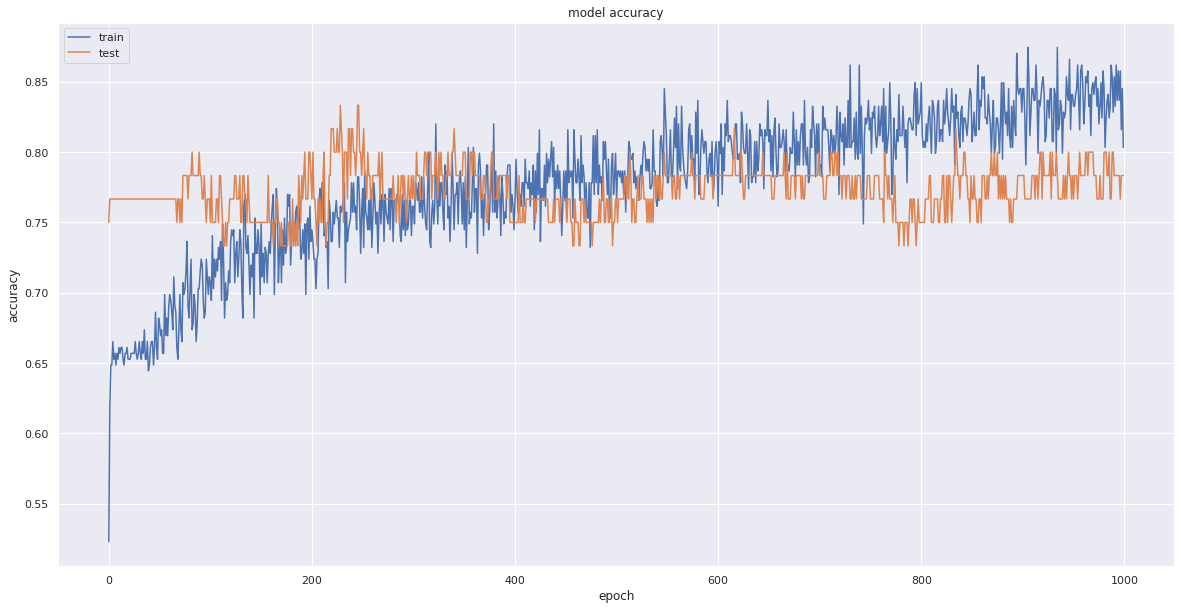

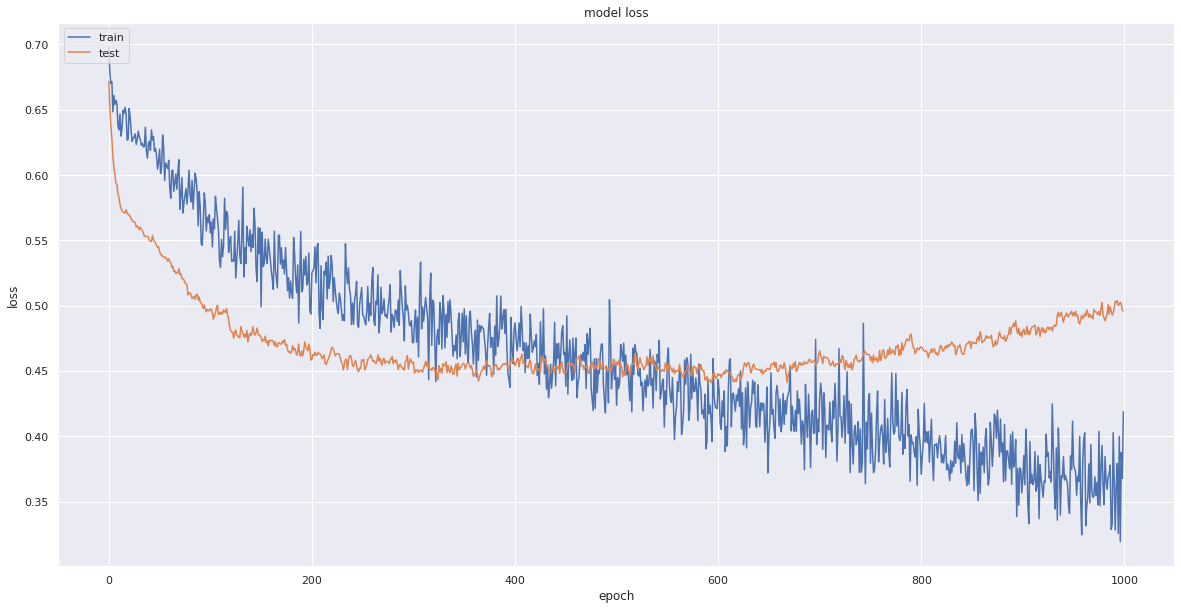

In [10]:
# NEURAL NETWORK
#https://www.tensorflow.org/guide/keras/train_and_evaluate

model = Sequential()
model.add(Dense(20, input_dim=Y_position-1, activation='relu'))
model.add(Dropout(0.20))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.20))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.20))
model.add(Dense(1, activation='sigmoid')) 
# Compile mode
# https://www.tensorflow.org/guide/keras/train_and_evaluate

model.compile(loss='binary_crossentropy', optimizer='Adamax', metrics=['accuracy'])
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=1000, batch_size=5, verbose=0)
# evaluate the model
scores = model.evaluate(X_train, y_train)
#print(scores)
print("Neural Network Trainset: \n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

predictions5 = model.predict(X_test)
#print(predictions)
#print('predictions shape:', predictions.shape)

y_pred5 = (predictions5 > 0.5)
y_pred5 = y_pred5*1 #convert to 0,1 instead of True False
cm5 = confusion_matrix(y_test, y_pred5)
print("==================================")
print("==================================")
print("Neural Network on testset confusion matrix")
print(cm5)

## Get accurary from Confusion matrix
## Position 0,0 and 1,1 are the correct predictions 
acc5 = (cm5[0,0] + cm5[1,1]) / sum(sum(cm5))
print("Neural Network on TestSet: Accuracy %.2f%%" % (acc5*100))

sns.set_theme()
sns.set(rc={'figure.figsize':(20,10)})
# list all data in history
print(history.history.keys())
# summarize history for accuracy
# sns.lineplot(history.history['accuracy'])
# sns.lineplot(history.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()
# summarize history for loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Decision Tree

1.   Default Tree
2.   Gridsearch Tuned Tree
3.   ccp_alphas Tuned Tree



In [12]:
# load dataset, no need normalisation
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

df['anaemia'] = df['anaemia'].astype(int)
df['diabetes'] = df['diabetes'].astype(int)
df['high_blood_pressure'] = df['high_blood_pressure'].astype(int)
df['sex'] = df['sex'].astype(int)
df['smoking'] = df['smoking'].astype(int)
df['DEATH_EVENT'] = df['DEATH_EVENT'].astype(int)

# drop time feature
df = df.drop(["time"],axis=1)

names = df.columns.tolist()
names[names.index('creatinine_phosphokinase')] = 'CPK'
df.columns = names

display(df.head())

#Prepare model
Y_position = 11

X = df.iloc[:,0:11]
Y = df.iloc[:,11]

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=2020)

,age,anaemia,CPK,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


[[164   0]
 [  0  75]]
100.00%
[[29  7]
 [10 14]]
71.67%
              precision    recall  f1-score   support

    No-Death       0.81      0.74      0.77        39
       Death       0.58      0.67      0.62        21

    accuracy                           0.72        60
   macro avg       0.69      0.71      0.70        60
weighted avg       0.73      0.72      0.72        60

Feature importance:
1. age (0.09965989821352861)
2. anaemia (0.026717479674796752)
3. CPK (0.14718494226959075)
4. diabetes (0.014573170731707318)
5. ejection_fraction (0.16343559408703257)
6. high_blood_pressure (0.0016815196998123943)
7. platelets (0.1150982845068211)
8. serum_creatinine (0.3039440042953907)
9. serum_sodium (0.1061460666452067)
10. sex (0.009715447154471545)
11. smoking (0.0118435927216415)
|--- serum_creatinine <= 1.65
|   |--- age <= 79.00
|   |   |--- ejection_fraction <= 32.50
|   |   |   |--- ejection_fraction <= 16.00
|   |   |   |   |--- class: 1
|   |   |   |--- ejection_fraction > 

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

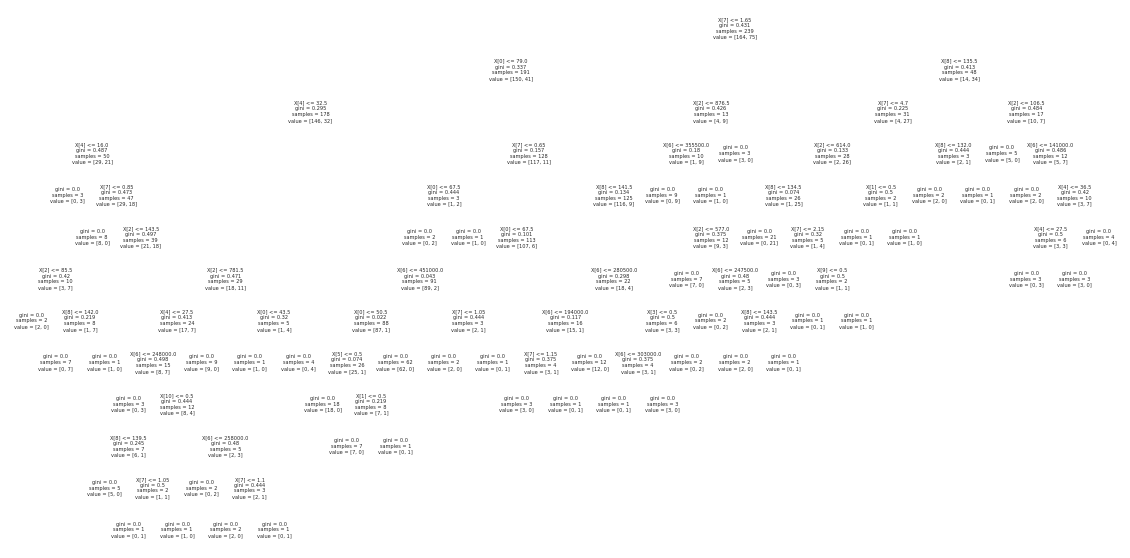

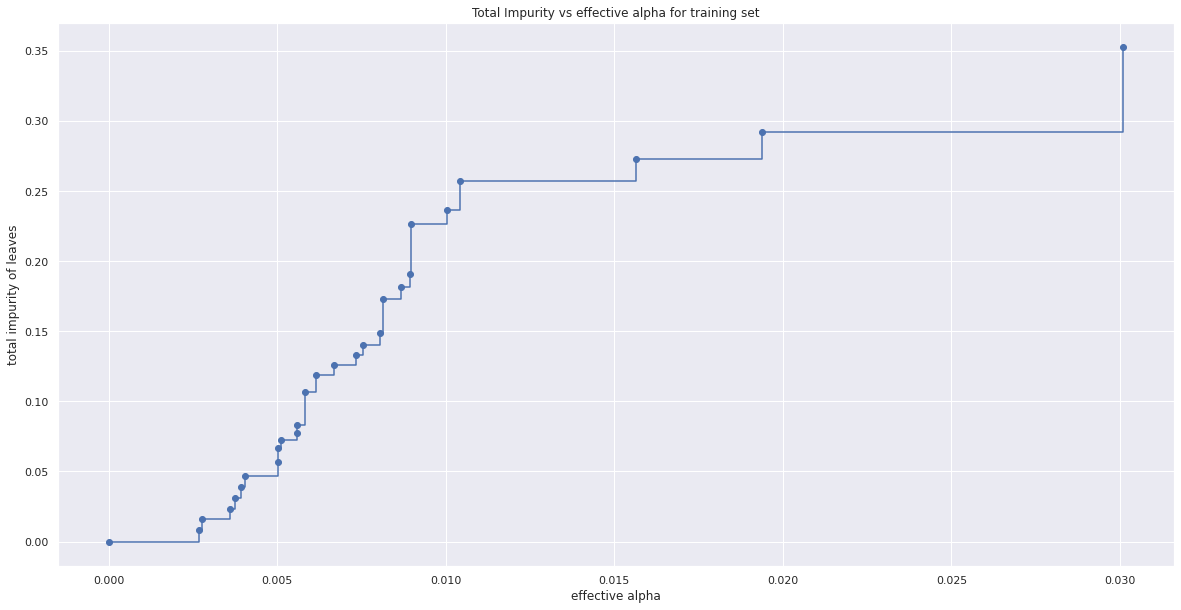

In [13]:
# DEFAULT TREE
dt1 = tree.DecisionTreeClassifier(random_state=123)
dt1 = dt1.fit(X_train, y_train)
dt1_pred_train = dt1.predict(X_train)
dt1_cmtrain = confusion_matrix(dt1_pred_train,y_train)
print(dt1_cmtrain)
acc_dt1 = (dt1_cmtrain[0,0] + dt1_cmtrain[1,1]) / sum(sum(dt1_cmtrain))
print("%.2f%%" % (acc_dt1*100))
dt1_pred_test = dt1.predict(X_test)
dt1_cmtest = confusion_matrix(dt1_pred_test,y_test)
acc_tdt1 = (dt1_cmtest[0,0] + dt1_cmtest[1,1]) / sum(sum(dt1_cmtest))
print(dt1_cmtest)
print("%.2f%%" % (acc_tdt1*100))
print(classification_report(y_test, dt1_pred_test,target_names= ['No-Death','Death']))

features_importance = dt1.feature_importances_
feature_names = df.columns
feature_names = feature_names[0:11]
print("Feature importance:")
for i, data_class in enumerate(feature_names):
    print("{}. {} ({})".format(i + 1, data_class, features_importance[i]))

tree.plot_tree(dt1)
rule = export_text(dt1, feature_names=X_train.columns.tolist())
dt1.get_depth()
print(rule)

path = dt1.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [14]:
# GRIDSEARCH TUNED TREE

tree_depth = [2,3,4,5,6,7,8,9,10,11,12]
min_sample = [2,10,20,30,40,70,90,100,150,200]
min_impurity = [0.0,0.1,0.2,0.3,0.4,0.5]
parameter = dict(max_depth=tree_depth,min_samples_split=min_sample, min_impurity_decrease=min_impurity)

print("# Tuning hyper-parameters")
print()
d_tree = tree.DecisionTreeClassifier(random_state=123)
clf = GridSearchCV(d_tree, parameter, cv=10)
clf.fit(X_train, y_train)
print("Best parameters set found on training set:")
print()
print(clf.best_params_)
print()
print("Grid scores on training set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.2f%% (+/-%0.03f%%) for %r"
          % (mean*100, std *100 * 2, params))
print()
print("Detailed classification report:")
print()
print("The model is used on test set.")
print("The scores are computed on the test set.")
print()
y_true, y_pred = y_test, clf.predict(scaled_X_test)
print(classification_report(y_true, y_pred))
print()


dtn1 = tree.DecisionTreeClassifier(random_state=123, max_depth = 3, min_samples_split = 70, min_impurity_decrease=0.0)
dtn1 = dtn1.fit(X_train, y_train)
dtn1_pred_train = dtn1.predict(X_train)
dtn1_cmtrain = confusion_matrix(dtn1_pred_train,y_train)
print(dtn1_cmtrain)
acc_dtn1 = (dtn1_cmtrain[0,0] + dtn1_cmtrain[1,1]) / sum(sum(dtn1_cmtrain))
print("%.2f%%" % (acc_dtn1*100))
dtn1_pred_test = dtn1.predict(X_test)
dtn1_cmtest = confusion_matrix(dtn1_pred_test,y_test)
acc_tdtn1 = (dtn1_cmtest[0,0] + dtn1_cmtest[1,1]) / sum(sum(dtn1_cmtest))
print(dtn1_cmtest)
print("%.2f%%" % (acc_tdtn1*100))
print(classification_report(y_test, dtn1_pred_test,target_names= ['No-Death','Death']))

# Tuning hyper-parameters

Best parameters set found on training set:

{'max_depth': 3, 'min_impurity_decrease': 0.0, 'min_samples_split': 70}

Grid scores on training set:

72.84% (+/-15.736%) for {'max_depth': 2, 'min_impurity_decrease': 0.0, 'min_samples_split': 2}
72.84% (+/-15.736%) for {'max_depth': 2, 'min_impurity_decrease': 0.0, 'min_samples_split': 10}
72.84% (+/-15.736%) for {'max_depth': 2, 'min_impurity_decrease': 0.0, 'min_samples_split': 20}
72.84% (+/-15.736%) for {'max_depth': 2, 'min_impurity_decrease': 0.0, 'min_samples_split': 30}
73.26% (+/-15.722%) for {'max_depth': 2, 'min_impurity_decrease': 0.0, 'min_samples_split': 40}
74.11% (+/-13.637%) for {'max_depth': 2, 'min_impurity_decrease': 0.0, 'min_samples_split': 70}
74.11% (+/-13.637%) for {'max_depth': 2, 'min_impurity_decrease': 0.0, 'min_samples_split': 90}
74.11% (+/-13.637%) for {'max_depth': 2, 'min_impurity_decrease': 0.0, 'min_samples_split': 100}
74.11% (+/-13.637%) for {'max_depth': 2, 'min_impurity_dec

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


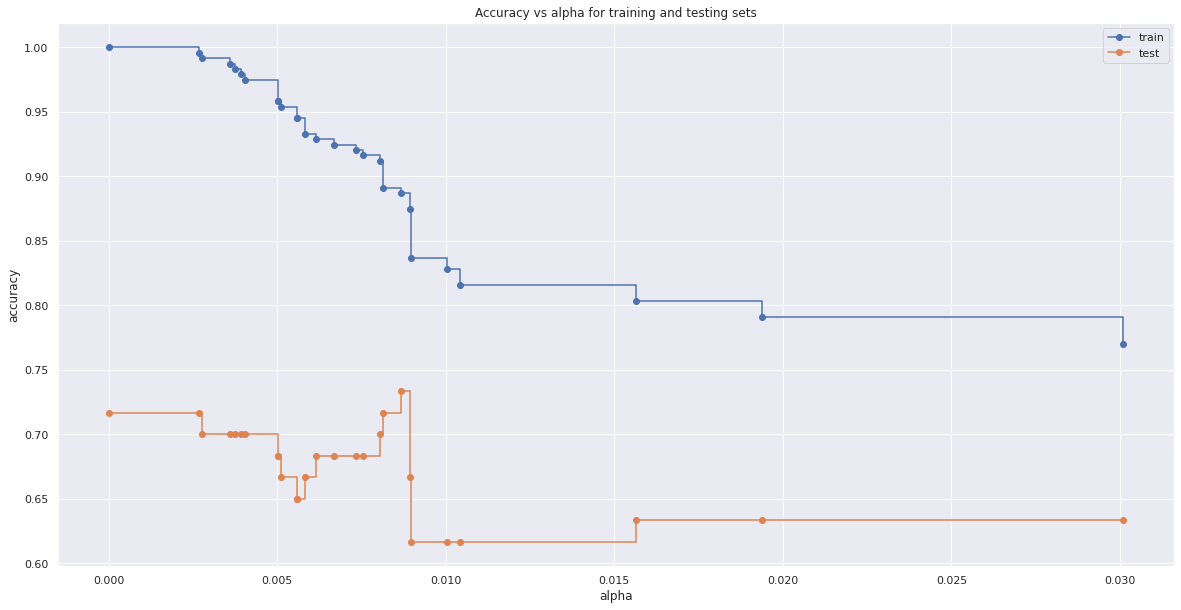

[[152  15]
 [ 12  60]]
88.70%
[[31  8]
 [ 8 13]]
73.33%
              precision    recall  f1-score   support

    No-Death       0.79      0.79      0.79        39
       Death       0.62      0.62      0.62        21

    accuracy                           0.73        60
   macro avg       0.71      0.71      0.71        60
weighted avg       0.73      0.73      0.73        60

|--- serum_creatinine <= 1.65
|   |--- age <= 79.00
|   |   |--- ejection_fraction <= 32.50
|   |   |   |--- ejection_fraction <= 16.00
|   |   |   |   |--- class: 1
|   |   |   |--- ejection_fraction >  16.00
|   |   |   |   |--- serum_creatinine <= 0.85
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- serum_creatinine >  0.85
|   |   |   |   |   |--- CPK <= 143.50
|   |   |   |   |   |   |--- CPK <= 85.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- CPK >  85.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- CPK >  143.50
|   |   |   |   |   |   |--- CPK <=

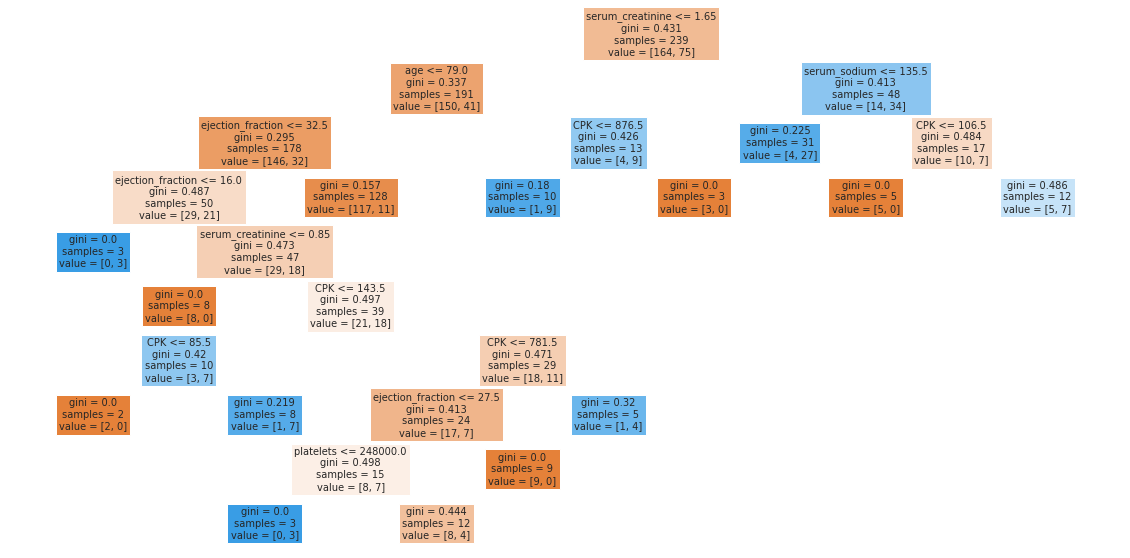

In [15]:
# CCP PRUNED TREE
ccp_clfs = []
for ccp_alpha in ccp_alphas[:-1]:
    ccp_clf = tree.DecisionTreeClassifier(random_state=123, ccp_alpha=ccp_alpha)
    ccp_clf.fit(X_train, y_train)
    ccp_clfs.append(ccp_clf)

train_scores = [ccp_clf.score(X_train, y_train) for ccp_clf in ccp_clfs]
test_scores = [ccp_clf.score(X_test, y_test) for ccp_clf in ccp_clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas[:-1], train_scores, marker='o', label="train",drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores, marker='o', label="test",drawstyle="steps-post")
ax.legend()
plt.show()

ccp_alphas
# D - New Model 2

dtn2 = tree.DecisionTreeClassifier(random_state=123, ccp_alpha=0.00892608)
dtn2 = dtn2.fit(X_train, y_train)
dtn2_pred_train = dtn2.predict(X_train)
dtn2_cmtrain = confusion_matrix(dtn2_pred_train,y_train)
print(dtn2_cmtrain)
acc_dtn2 = (dtn2_cmtrain[0,0] + dtn2_cmtrain[1,1]) / sum(sum(dtn2_cmtrain))
print("%.2f%%" % (acc_dtn2*100))
dtn2_pred_test = dtn2.predict(X_test)
dtn2_cmtest = confusion_matrix(dtn2_pred_test,y_test)
acc_tdtn2 = (dtn2_cmtest[0,0] + dtn2_cmtest[1,1]) / sum(sum(dtn2_cmtest))
print(dtn2_cmtest)
print("%.2f%%" % (acc_tdtn2*100))
print(classification_report(y_test, dtn2_pred_test,target_names= ['No-Death','Death']))

tree.plot_tree(dtn2,feature_names=X_train.columns.tolist(), filled = True)
fig.savefig('imagename.png')
fig.show()
rule = export_text(dtn2, feature_names=X_train.columns.tolist())
dtn2.get_depth()
print(rule)

features_importance = dtn2.feature_importances_
feature_names = df.columns
feature_names = feature_names[0:11]
print("Feature importance:")
for i, data_class in enumerate(feature_names):
    print("{}. {} ({})".format(i + 1, data_class, features_importance[i]))